In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
/home/harleen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/harleen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/harleen/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/harleen/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
x=[]
y=[]

wildfire= pd.read_csv("forestfires.csv")
wildfire= np.array(wildfire)
wildfire = wildfire[..., np.newaxis]
choices= list(range(0,len(wildfire)))
indexes=[1,2,3,4,5,6,7]
wildfirey = []
for i in range(len(wildfire)):
    for j in range(7):
        x.append(wildfire[i][j])
        y.append(indexes[j])
    wildfirey.append(indexes)
x= np.array(x)
y= np.array(y)

wildfirey= np.array(wildfirey)
# wildfirey = wildfirey[..., np.newaxis]

print(len(wildfire),  len(wildfirey))

517 517


In [3]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y= train_test_split(wildfire, wildfirey, test_size=0.1, shuffle= False)
train_x, val_x, train_y, val_y= train_test_split(train_x, train_y, test_size=0.1, shuffle=False)

In [4]:
print(train_x.shape[1:])
print(train_y.shape[1:])

(7, 1)
(7,)


In [5]:
import keras

In [6]:
model = Sequential()
model.add(LSTM(32, input_shape=(7,1), return_sequences=True))
model.add(LSTM(32))

model.add(Dense(7, activation='softmax'))
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics = ['accuracy'])
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 418 samples, validate on 47 samples
Epoch 1/50
418/418 [==============================] - 1s 2ms/step - loss: 2.0931 - accuracy: 0.0000e+00 - val_loss: 2.0752 - val_accuracy: 0.0000e+00
Epoch 2/50
418/418 [==============================] - 0s 188us/step - loss: 2.0669 - accuracy: 0.0024 - val_loss: 2.0573 - val_accuracy: 0.8298
Epoch 3/50
418/418 [==============================] - 0s 210us/step - loss: 2.0553 - accuracy: 0.9522 - val_loss: 2.0533 - val_accuracy: 1.0000
Epoch 4/50
418/418 [==============================] - 0s 216us/step - loss: 2.0526 - accuracy: 0.9498 - val_loss: 2.0521 - val_accuracy: 1.0000
Epoch 5/50
418/418 [==============================] - 0s 201us/step - loss: 2.0519 - accuracy: 1.0000 - val_loss: 2.0516 - val_accuracy: 1.0000
Epoch 6/50
418/418 [==============================] - 0s 209us/step - loss: 2.0516 - accuracy: 1.0000 - val_loss: 2.0514 - val_accurac

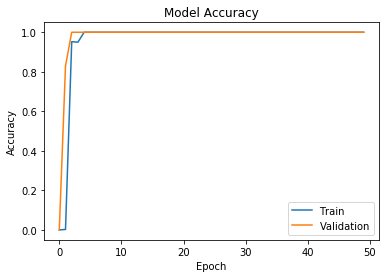

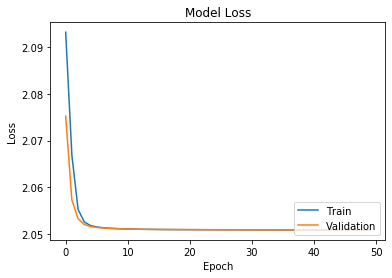

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [8]:
# model.save('RNN(final).h5')

In [9]:
acc, loss= model.evaluate(test_x, test_y)

52/52 [==============================] - 0s 238us/step


In [10]:
print(acc, loss)

2.050926978771503 1.0


In [22]:
predictions= model.predict(test_x1)

In [21]:
test_x1 = test_x[len(test_x)-20]
test_x1 = test_x1[np.newaxis,...]



In [23]:
print(test_x1)

[[[ 96.1 ]
  [181.1 ]
  [671.2 ]
  [ 14.3 ]
  [ 32.3 ]
  [ 27.  ]
  [ 14.68]]]


In [25]:
print(predictions*100)

[[6.5103020e-03 8.2916664e-03 2.8152251e+00 1.2765527e+01 2.1202858e+01
  2.8487959e+01 3.4713631e+01]]
